In [22]:
# Hello! Welcome to this script that allows you to take a series of images from ROV-footage, crop them, 
# and extract depth information from the ROV overlay. This script is adapted to output from SUBSIM
# (www.subsim.se) Jupyter notebook "Upload clips or frames to Zooniverse" which generates a series of images 
# from a video at a set rate. This was used by Nilsson et al. (2025) to assign image frames annotated by a 
# YOLOv8 object detection model with depths for ecological analyses. 
# Questions can be emailed to christian.nilsson7@outlook.com

# First, load the necessary packages.
import os
import csv
import easyocr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance, ImageOps

In [2]:
# Set up a file path to a test image.
file_path = 'Path/to/chp_1_example_data/01747001_frame_0.jpg'

# Set up a folder path for later analysis of all included images.
folder_path = 'Path/to/chp_1_example_data/'

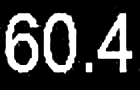

In [3]:
# Due to national security reasons, we are unable to share uncropped images that include seafloor
# and depth. Therefore this script will proceed with pre-cropped example footage.

# Play around with image optics to make it as clear as possible.
img = Image.open(file_path)

# !OPTIONAL USE ONLY WITH OUTPUT DATA FROM SUBSIM

# Cropping coordinates, try to find only the depth value (i.e. as in the example data)
#start_height = 110
#end_height = 15
#start_width = 160
#end_width = 230

#cropped_img = img.crop((start_width, start_height, end_width, end_height))

# All these are optional, just do what works best for you :)

enhancer = ImageEnhance.Contrast(img) # Can change to "cropped_img"
            
contrast_factor = 2 # Degree of contrast.
                
adjusted_img = enhancer.enhance(contrast_factor)

adjusted_img = ImageOps.invert(adjusted_img) # Invert colors.

resized_img = adjusted_img.resize((140, 90)) # Change size of output image. This can actually impact OCR performance!

resized_img

In [5]:
# Apply these changes and test OCR on the image

reader = easyocr.Reader(['en']) # OCR language

img = Image.open(file_path)
                                
#cropped_img = img.crop((start_width, start_height, end_width, end_height))
        
enhancer = ImageEnhance.Contrast(img) # Can change to "cropped_img
            
contrast_factor = 2
                
adjusted_img = enhancer.enhance(contrast_factor)

adjusted_img = ImageOps.invert(adjusted_img)

adjusted_img = adjusted_img.resize((140, 90))

adjusted_img.save('C:/Users/chris/OneDrive/Skrivbord/output.jpg') # OCR requires an image file, so you need to save output
                                                                  # somewhere.  
                
result = reader.readtext('C:/Users/chris/OneDrive/Skrivbord/output.jpg', allowlist='.0123456789') # Allowlist regulates which
                                                                                                  # characters the OCR can
                                                                                                  # recognize.

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [6]:
# Check the...
result

# Last two columns are the important ones. Read text and confidence.

[([[0, 4], [140, 4], [140, 82], [0, 82]], '60.4', 0.6573424283483521)]

In [6]:
# Use only when you need to crop images

# Function that performs the same operation as the previous two cells, but on yout entire folder of images, overwriting them
# with cropped images. Make sure to have a copy ready!

#def crop_and_ocr_images(folder_path):
    
#    reader = easyocr.Reader(['en'])
    
#    ocr_results_df = pd.DataFrame(columns = ['original_filename', 'depth_m'])
    
#    files = os.listdir(folder_path)
    
#    for file_name in files:
        
#        file_path = os.path.join(folder_path, file_name)
        
#        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
#            try:
                
#                img = Image.open(file_path)
                
#                cropped_file_path = os.path.splitext(file_path)[0] + '_cropped' + os.path.splitext(file_path)[1]
                
#                cropped_img = img.crop((start_width, start_height, end_width, end_height))
        
#                enhancer = ImageEnhance.Contrast(cropped_img)
            
#                contrast_factor = 1.7
                
#                adjusted_img = enhancer.enhance(contrast_factor)

#                adjusted_img = ImageOps.invert(adjusted_img)
        
#                resized_img = adjusted_img.resize((140, 90))
                
#                resized_img.save(file_path)
                
#                result = reader.readtext(file_path, allowlist='.0123456789')
                
#                for detection in result:
#                    ocr_results_df = ocr_results_df.append({'original_filename': file_name, 'depth_m': detection[1]}, ignore_index = True)
                    
#           except Exception as e:
#                print(f"Error processing {file_name}: {e}")
                
#        else:
#            print(f"Skipping non-image file: {file_name}")
    
#    return(ocr_results_df) # Output dataframe including filenames and text reads.

In [13]:
# Run it! (you can track progress in the folder your working in by looking at images as large icons)
#depthframe = crop_and_ocr_images(folder_path)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [7]:
# Use this on the example data.
def ocr_images(folder_path):
    
    reader = easyocr.Reader(['en'])
    
    ocr_results_df = pd.DataFrame(columns = ['original_filename', 'depth_m'])
    
    files = os.listdir(folder_path)
    
    for file_name in files:
        
        file_path = os.path.join(folder_path, file_name)
        
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            try:
                
                img = Image.open(file_path)
                     
                enhancer = ImageEnhance.Contrast(img)
            
                contrast_factor = 1.7
                
                adjusted_img = enhancer.enhance(contrast_factor)

                adjusted_img = ImageOps.invert(adjusted_img)
        
                resized_img = adjusted_img.resize((140, 90))
                               
                result = reader.readtext(file_path, allowlist='.0123456789')
                
                for detection in result:
                    ocr_results_df = ocr_results_df.append({'original_filename': file_name, 'depth_m': detection[1]}, ignore_index = True)
                    
            except Exception as e:
                print(f"Error processing {file_name}: {e}")
                
        else:
            print(f"Skipping non-image file: {file_name}")
    
    return(ocr_results_df)

In [8]:
# Run it!
depthframe=ocr_images(folder_path)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [9]:
# Check out your...
depthframe

,original_filename,depth_m
0,01747001_frame_0.jpg,60.4
1,01747001_frame_10080.jpg,113.
2,01747001_frame_10185.jpg,113.
3,01747001_frame_10290.jpg,113.
4,01747001_frame_10395.jpg,113.
...,...,...
496,01747003_frame_9555.jpg,63.2
497,01747003_frame_9660.jpg,63.1
498,01747003_frame_9765.jpg,63.2
499,01747003_frame_9870.jpg,62.9


In [10]:
# Turn your dataframe from one with file names and text reads to one with frame numbers and depth reads!
# (made for a filename formate of "VIDEONAME_frame_FRAMENUMBER")

split_frame = depthframe['original_filename'].str.split('_', expand=True)
depthframe['filename'] = split_frame[0]
depthframe['frame_no'] = split_frame[2]
depthframe.drop(columns=['original_filename'], inplace=True)

In [11]:
# Not done yet, but take a look! (.jpg should be part of "frame_no" here).
depthframe

,depth_m,filename,frame_no
0,60.4,01747001,0.jpg
1,113.,01747001,10080.jpg
2,113.,01747001,10185.jpg
3,113.,01747001,10290.jpg
4,113.,01747001,10395.jpg
...,...,...,...
496,63.2,01747003,9555.jpg
497,63.1,01747003,9660.jpg
498,63.2,01747003,9765.jpg
499,62.9,01747003,9870.jpg


In [12]:
# Before we're done we've got some bug fixes to take care of. Start by making a copy to be safe.
depthframe2 = depthframe.copy()

In [13]:
# A common issue is the read of two periods in a row. Remove any of those here.
def remove_one_period(text):
    return text.replace('..', '.')

depthframe['depth_m'] = depthframe['depth_m'].apply(remove_one_period)

In [14]:
# See if you can convert depth reads to float type, frame number to int, and remove ".jpg" from the filename.
depthframe['depth_m'] = depthframe['depth_m'].astype(float)
depthframe['frame_no'] = depthframe['frame_no'].str[:-4]
depthframe['frame_no'] = depthframe['frame_no'].astype(int)

# No error? You're good to proceed!

In [15]:
# Specify the max frame number of your videos.
maxframes = 17463

# Since frame number resets at the start of each consecutive video, we have to make it consecutive
# ourselves. This function does just that by adding the maximum frame number of the previous video
# to the next. However, you must know the maximum frame number of your videos and all except the
# last video have to have the same max frame number for this to work.
def consecutivize(df):
    
    df_copy = df.copy() 
    
    filenames = df_copy['filename'].unique()
    
    n_frames = 0
    
    for file in filenames:
        
        df_copy.loc[df_copy['filename'] == file, 'frame_no'] += n_frames
        
        n_frames = n_frames + maxframes + 1 # +1 if frame numbers reset to 0
        
        print(df_copy[df_copy['filename'] == file]['frame_no'].max())
    
    return df_copy

In [16]:
# Run it! The difference between the output values should be = maxframes (+ 1) 
# (except the last if it has less frames, which is okay).
depthframe=consecutivize(depthframe)

17430
34894
52358


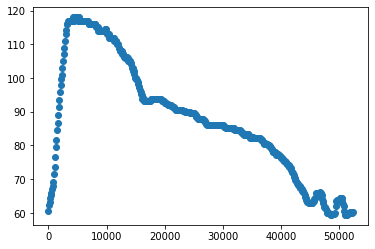

In [19]:
# Check the depth distribution vs. frame numbers. Can you spot any bugs?
plt.scatter(depthframe['frame_no'], depthframe['depth_m'])

In [ ]:
# OPTIONAL Use this to easily identify values with unreasonably high differences to their neighbor (for mask purposes).

depth_m_diff = depthframe['depth_m'].diff()

In [18]:
# OPTIONAL - If you have some outliers that look a degree of power or two too high. Try this to bring them down to the others.

# Make a logical mask that isolates problematic depth values. Here are some options, use those that are useful, mute the others.
mask = (depthframe['depth_m'] > 200) #& (depthframe['frame_no']<40000) #& (depthframe['frame_no']<52400) # | ((test['frame_no'] > 50000) & (test['depth_m'] > 60)) #| (abs(depth_m_diff) > 3) # | ((test['frame_no'] > 50000) & (test['depth_m'] > 60))

# Apply it, and divide problematic depth values by 10.
depthframe.loc[mask, 'depth_m'] /= 10

# Go back and check the depth graph!

# If it looks good, move on to the next non-optional step!

In [ ]:
# OPTIONAL - If you have some outliers that just look wrong. Try this to remove them, linear interpolation will give them 
# depths later in R.

# Make a logical mask that isolates problematic depth values. Here are some options, use those that are useful, mute the others.
#mask = (depthframe['depth_m'] > 200) #& (depthframe['frame_no']<40000) #& (depthframe['frame_no']<52400) # | ((test['frame_no'] > 50000) & (test['depth_m'] > 60)) #| (abs(depth_m_diff) > 3) # | ((test['frame_no'] > 50000) & (test['depth_m'] > 60))

# Apply it, and remove problematic depth values.
#depthframe.loc[mask, 'depth_m'] = np.nan

# Go back and check the depth graph!

# If it looks good, move on to the next non-optional step!

In [20]:
# OPTIONAL Check the working directory before exporting.
os.getcwd()

'C:\\Users\\chris\\OneDrive\\Skrivbord\\Depth_Learning_Submission\\Depth learning code\\1 - Depth extraction'

In [21]:
# Done already? Congrats! Name and export your fancy new df to your working directory.

# Add a leading apostrophe to avoid excel reading filename as int's and removing leading 0's
depthframe["filename"] = depthframe["filename"].apply(lambda x: f"'{x}")

depthframe.to_csv('chp_2_depth_df.csv', index = False)